# Оптимизация функции потерь

## Библиотека SymPy

### Пример работы в SymPy

In [ ]:
# импортируем функцию квадратного корня из модуля math
from math import sqrt

# эта функция рассчитает приблизительное значение
sqrt(11)

3.3166247903554

In [ ]:
# аналогичная функция библиотеки sympy
from sympy import sqrt

# выведет математическое выражение
sqrt(11)

sqrt(11)

### Вычисление производной в SymPy

In [ ]:
# импортируем функцию diff()
from sympy import diff

# и кроме того попросим Питон считать w символом, а не переменной
from sympy.abc import w

In [ ]:
# зададим функцию, которую хотим дифференцировать
f = (2 - w) ** 2

# и передадим ее в diff() вместе с символом w
diff(f, w)

2*w - 4

## Пример простой оптимизации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Функция потерь и ее производная

In [ ]:
# зададим функцию потерь
def objective(x):
	return (x - 2 ) ** 2.0

# и ее производную
def derivative(x):
	return 2.0 * x - 4

### Исходные параметры модели

In [ ]:
# изначальный вес
w = -3

# количество итераций
iter = 100

# скорость обучения
learning_rate = 0.05

### Алгоритм оптимизации

In [ ]:
# создадим списки для весов, уровня потерь и значения производной
w_list = []
l_list = []
d_list = []

In [ ]:
# в цикле с заданным количеством итераций
for i in range(iter):

  # будем добавлять значение w,
  w_list.append(w)

  # уровень потерь
  l_list.append(objective(w))

  # и значение производной при текущем значении w
  d_list.append(derivative(w))

  # но главное, будем обновлять веса в направлении, 
  # обратном направлению производной, умноженному на скорость обучения
  w = w - learning_rate * derivative(w)

# после завершения цикла, выведем итоговый вес w,
# значение функции потерь и значение производной в этой точке
w, objective(w), derivative(w)

(1.999867193005562, 1.76376977716448e-08, -0.00026561398887592347)

### Оценка результата

In [ ]:
# посмотрим на первые значения весов и производной
w_list[:3], d_list[:3]

([-3, -2.5, -2.05], [-10.0, -9.0, -8.1])

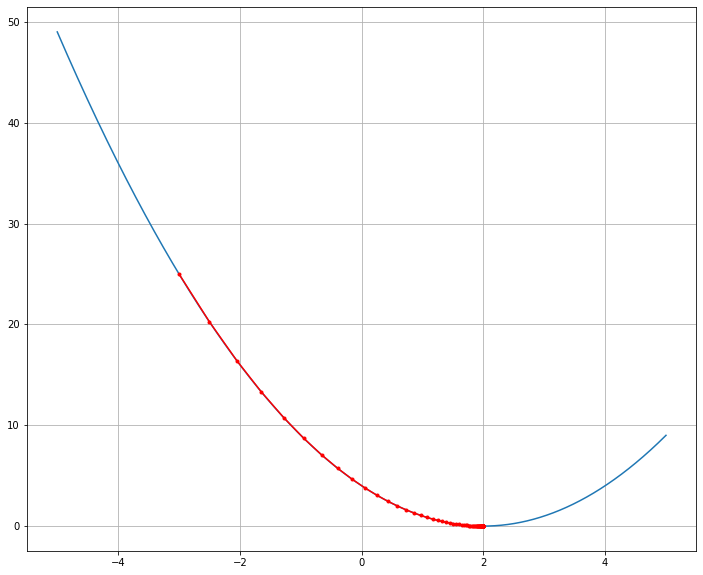

In [ ]:
# зададим размер графика
plt.figure(figsize = (12,10))

# построим функцию потерь (параболу)
x = np.linspace(-5, 5, 5000)
y = objective(x)
plt.plot(x, y)

# выведем шаги алгоритма оптимизации
plt.plot(w_list, l_list, '.-', color = 'red')

# добавим сетку и выведем результат
plt.grid()
plt.show()

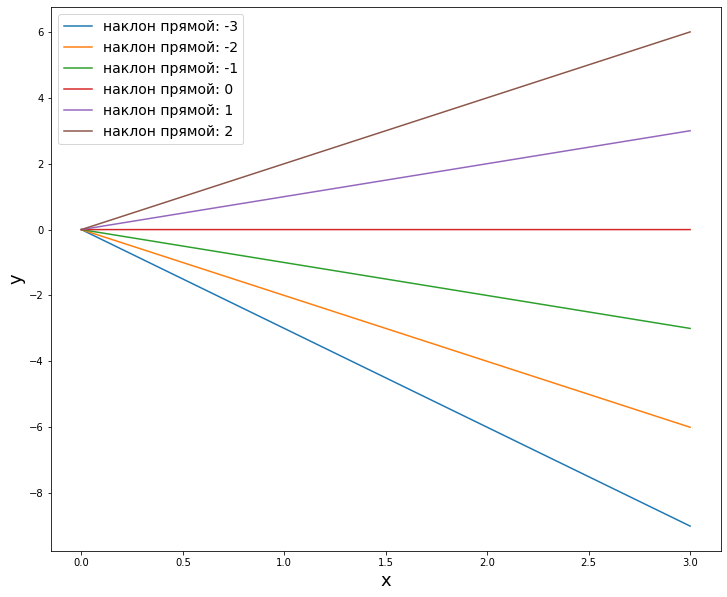

In [ ]:
# настроим размер графика
plt.figure(figsize = (12,10))

# создадим примерную последовательность наших весов от -3 до 2 и в цикле
for w in range(-3, 3):

  # создадим точки для координаты x
  x = np.linspace(0, 3, 5000)

  # умножим наклон w на x 
  y = w * x

  # и построим прямые с соответствующим наклоном
  plt.plot(x, y, label = f'наклон прямой: {w}')

# укажем подписи к осям и положение легенды
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(loc = 'upper left', prop = {'size': 14})

# выведем результат
plt.show()